
# **Lista 05 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff

---


In [41]:
import matplotlib.pyplot as plt #usei para mostrar o resultado, apenas. O meu cv2.imshow() não funciona 
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Problema 1: 

> Escreva um programa que converta uma imagem colorida em RGB para RGB de cores seguras.  Converta a imagem do [cubo colorido](https://drive.google.com/file/d/1W5n2Pd6-XVeVUPDTmm04ZjLrn5m0sFlA/view?usp=sharing) para o formato RGB de cores seguras.

In [ ]:
def sRGB(path):
    img = cv2.imread(path)
    x, y = img.shape[0], img.shape[1]
    channel = 3
    sRGB = np.zeros((x,y,channel))
    for i in range(x):
     for j in range(y):
          sRGB[i,j,0] = (round((img[i,j,0]/255)*5)*51)
          sRGB[i,j,1] = (round((img[i,j,1]/255)*5)*51)
          sRGB[i,j,2] = (round((img[i,j,2]/255)*5)*51)		
    sRGB = np.uint8(sRGB)
    figsize=(20, 20)
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
    ax1.imshow(img, cmap = 'gray')
    plt.title('original')
    plt.axis('off')
    ax2.imshow(sRGB, cmap = 'gray')
    plt.title('Cores Seguras')
    plt.axis('off')
    plt.show()	
path_arr = ['cube.PNG']
for path in path_arr:
	sRGB(path)

# Problema 2:

> [imagem](https://drive.google.com/file/d/1iRxmM0FAsmrjRPeGvm7u6xs63XAXNCyb/view?usp=sharing)

> **2.1** Implemente um sistema de processamento de cores para gerar cores falsas (pseudo-cores), semelhante ao apresentado em aula. Neste sistema, você deve especificar dois intervalos de valores de níveis de cinza para a imagem de entrada. Seu sistema deverá gerar uma imagem de saída colorida (RGB) cujos pixels têm uma cor pré-especificada para estes intervalo de níveis de cinza na imagem de entrada. O restante dos pixels da imagem colorida devem ter o mesmo valor de nível de cinza da imagem de entrada.

> **2.2** Utilizando o programa desenvolvido em 2.1, processe a imagem de forma que o rio aparece amarelo e o restante da imagem conserve os tons de cinza originais. É aceitável ter alguns pontos isolados na imagem com cor amarela, mas este número deve ser baixo.

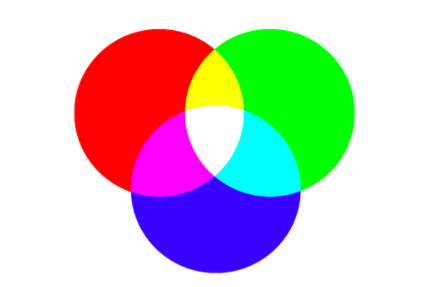

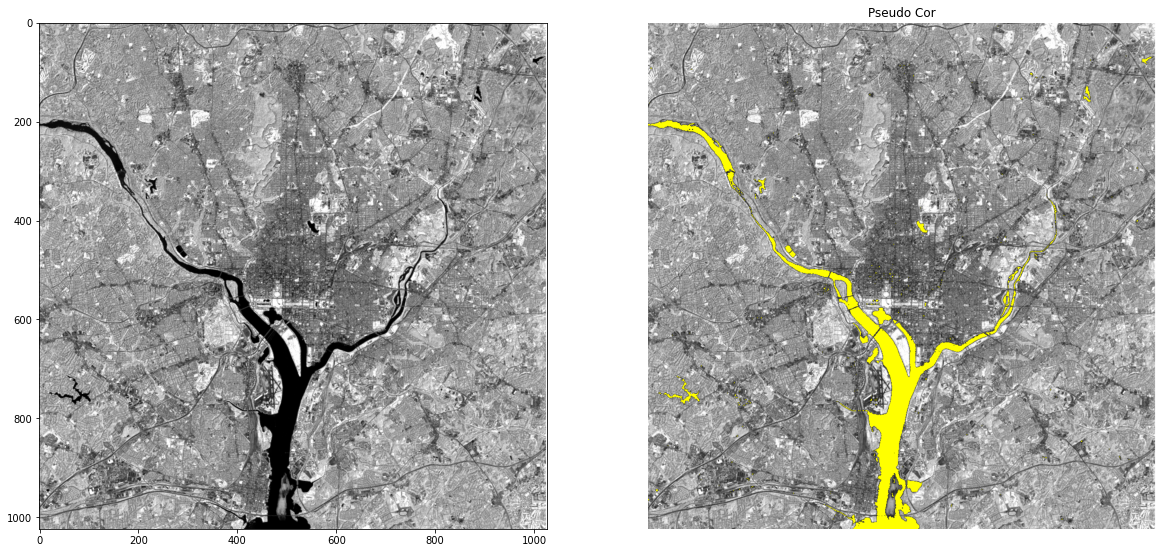

In [35]:
def amarelo(canal_r, canal_g, canal_b, i, j):
	canal_r[i,j] = 255
	canal_g[i,j] = 255
	canal_b[i,j] = 0
		
def pColor(path,value): 
	imagem = cv2.imread(path,0)
	h,w = imagem.shape[0], imagem.shape[1]
	channels = 3
	pseudocor = np.zeros((h,w,channels), dtype=np.int32)
 #separar os canais  
	canal_r = np.zeros((h,w))
	canal_g = np.zeros((h,w))
	canal_b = np.zeros((h,w))

	for i in range(h):
		for j in range(w):
			#os pixeis menores que K vão ser amarelo
			if imagem[i,j] < value:
				amarelo(canal_r, canal_g, canal_b, i, j)
			#os pixeis maiores que k continuarao com os valores
			else:
				canal_r[i,j] = imagem[i,j]
				canal_g[i,j] = imagem[i,j]
				canal_b[i,j] = imagem[i,j]

	pseudocor[:,:,0] = (canal_r)
	pseudocor[:,:,1] = (canal_g)
	pseudocor[:,:,2] = (canal_b)

	pseudocor = np.uint8(pseudocor)

	figsize=(20, 20)
	fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
	ax1.imshow(imagem, cmap = 'gray')
	plt.title('original')
	plt.axis('off')
	ax2.imshow(pseudocor)
	plt.title('Pseudo Cor')
	plt.axis('off')
	plt.show()	
 
pColor('rio.png', 30)

# Problema 3 

**3.1** Estude o funcionamento do algoritmo k-means com o seguinte material:
- https://youtu.be/yR7k19YBqiw
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html 

Leia a documentação da função [kmeans](https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html) do OpenCV. 

**3.2** Realize a redução do número de cores de uma imagem para 8, 64 e 256 cores. Para isto, escolha uma imagem cuja menor dimensão possui 720 pixels e 
Separe os 3 canais de cor da imagem. Em seguida, utilize a função [kmeans] para reduzir o número de cores da imagem. Lembre-se que o número total de clusters será igual a multiplicação do número de clusters de cada canal de cor.

**3.3** Substitua as cores originais pelas cores encontradas pelo k-means.  Calcule a PSNR de cada imagem com cores reduzidas com relação a imagem de referência. Calcule também a redução do número de bits necessários para representar a imagem com cores reduzidas

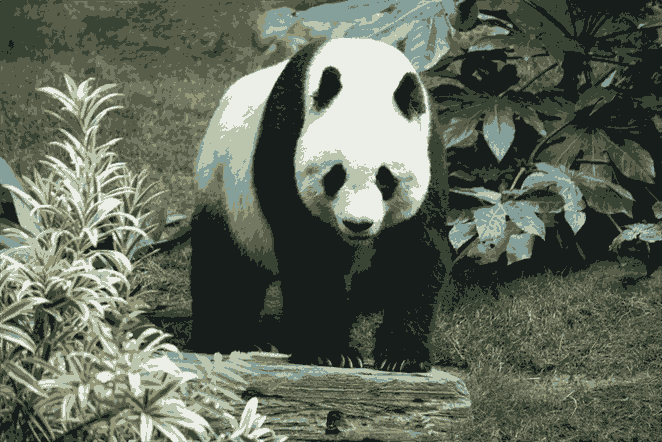

In [44]:
def kmeans():
	img = cv2.imread('panda.png')
	remold = img.reshape((-1,3))
	# convert to np.float32
	remold = np.float32(remold)	
  # define criteria, number of clusters(K) and apply kmeans()
	criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
	k = 8
	ret,label,center=cv2.kmeans(remold,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
	# Now convert back into uint8, and make original image
	center = np.uint8(center)
	res = center[label.flatten()]
	res2 = res.reshape((img.shape))
	cv2_imshow(res2)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

kmeans()
